importing the essentials

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv('vgsales.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'vgsales.csv'

Understanding the Data

In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
df.shape`

(16598, 11)

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

there are few null values which can be droped (in year & publisher)

In [ ]:
df.duplicated().sum()


0

there are no duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


No such distinct outlier in the dataset


In [ ]:
for col in df.columns[:5]:
    print(f'{col} : {df[col].unique()}')
    print('-'*50)

Rank : [    1     2     3 ... 16598 16599 16600]
--------------------------------------------------
Name : ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']
--------------------------------------------------
Platform : ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
--------------------------------------------------
Year : [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
--------------------------------------------------
Genre : ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
-----------------------------------

Data Cleaning

dropping all the data as there are plenty

In [ ]:
df.dropna(inplace=True)

In [ ]:
Exploratory Data Analysis (EDA)

Univariant EDA

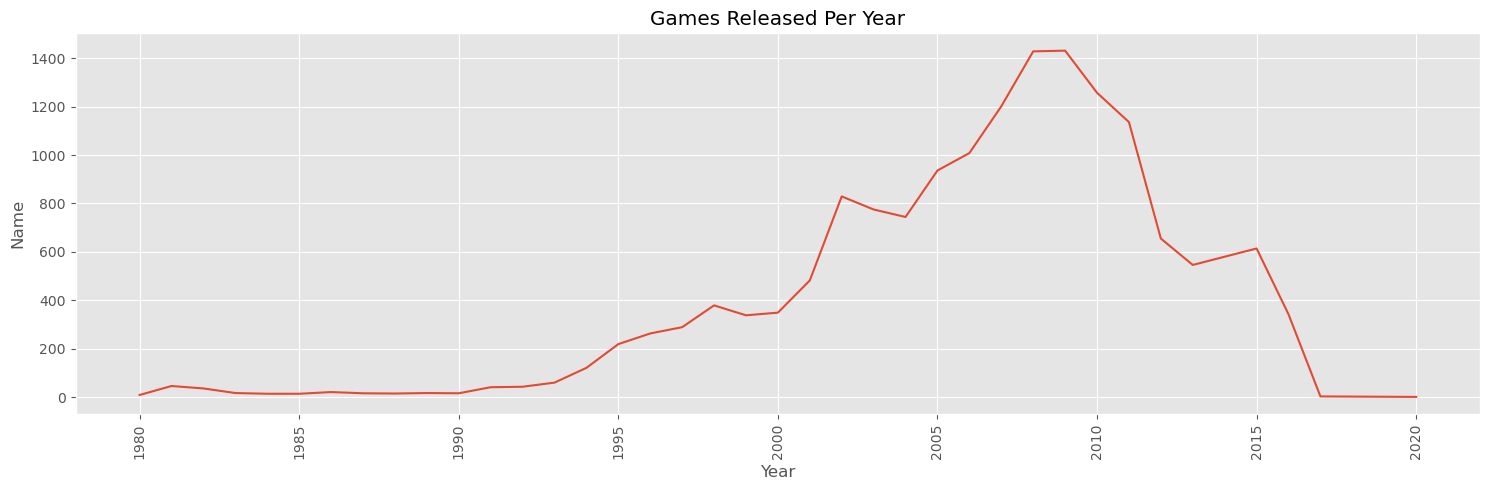

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Year", y="Name", data=df.groupby('Year')['Name'].count().reset_index()).set_title('Games Released Per Year')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Top 10 Publisher with most amount of release

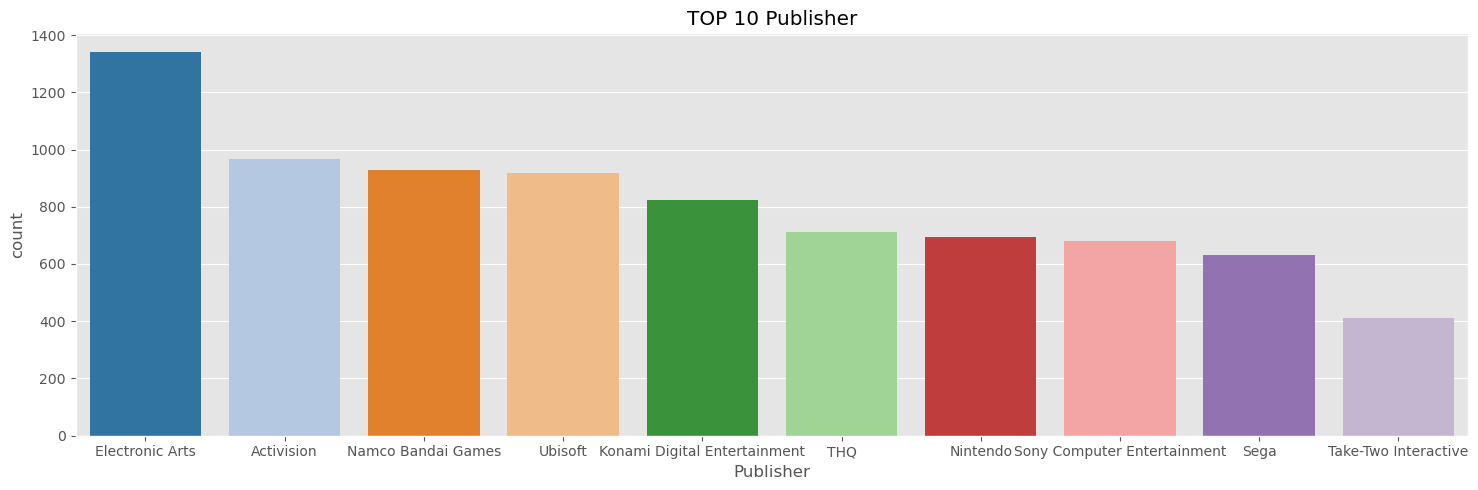

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Publisher', data = df, palette='tab20', order=df['Publisher'].value_counts().iloc[:10].index).set_title(f'TOP 10 Publisher')
plt.tight_layout()
plt.show()

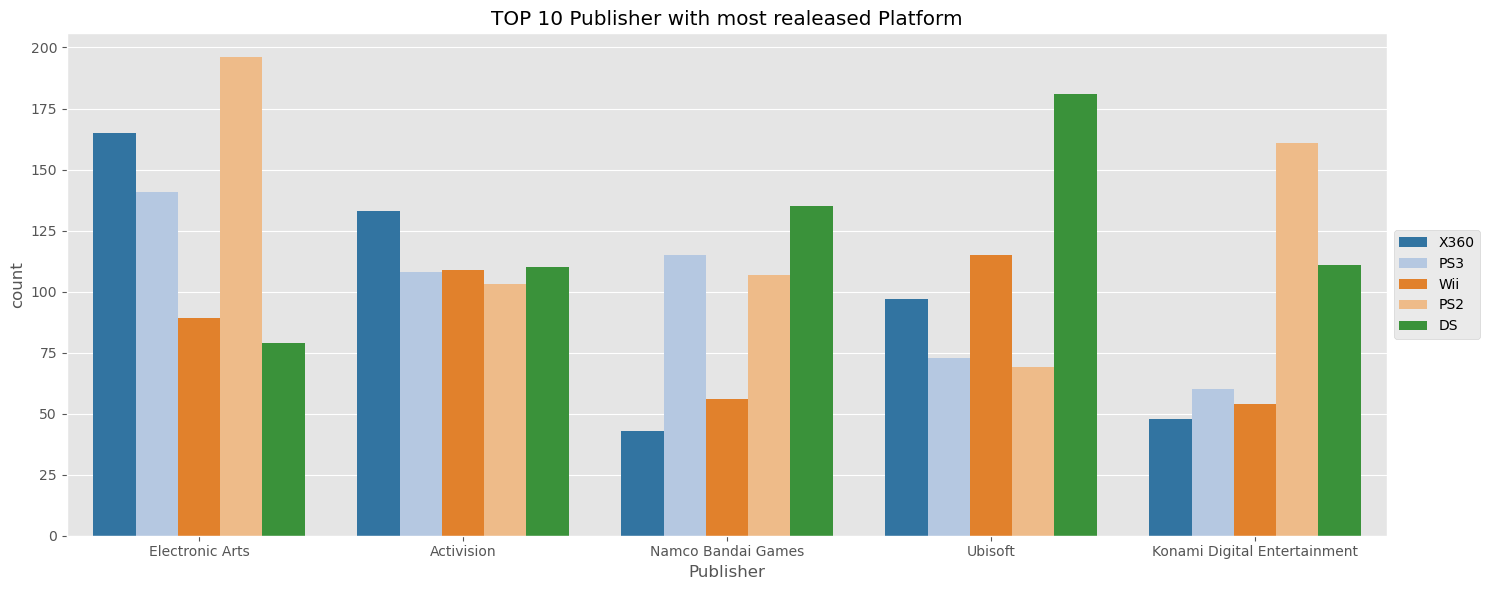

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Publisher', data = df[df['Publisher'].isin(df['Publisher'].value_counts().iloc[:5].index) & df['Platform'].isin(df['Platform'].value_counts().iloc[:5].index)], palette='tab20',hue ='Platform' , order=df['Publisher'].value_counts().iloc[:5].index).set_title(f'TOP 10 Publisher with most realeased Platform')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

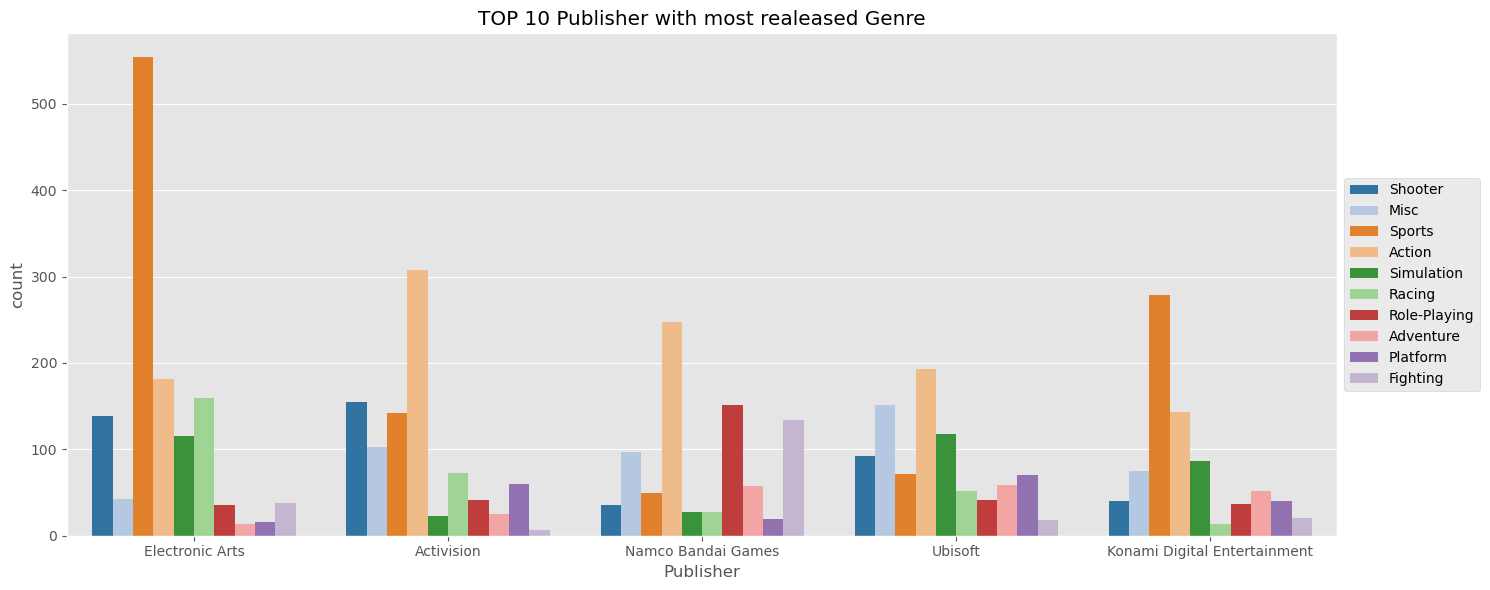

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Publisher', data = df[df['Publisher'].isin(df['Publisher'].value_counts().iloc[:5].index) & df['Genre'].isin(df['Genre'].value_counts().iloc[:10].index)], palette='tab20',hue ='Genre' , order=df['Publisher'].value_counts().iloc[:5].index).set_title(f'TOP 10 Publisher with most realeased Genre')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

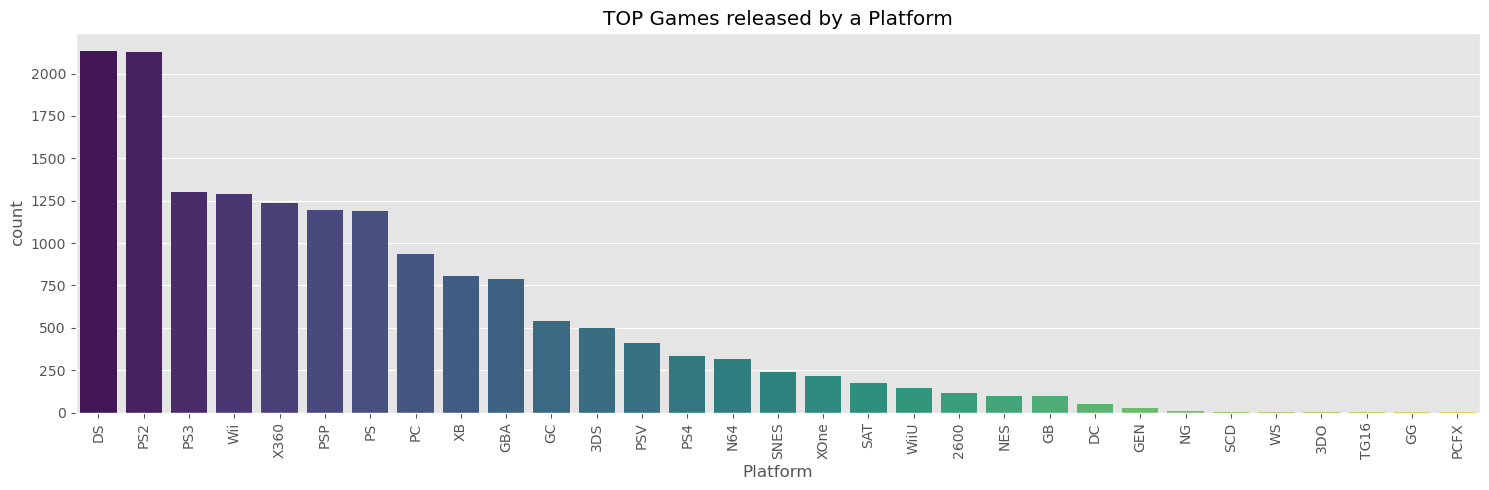

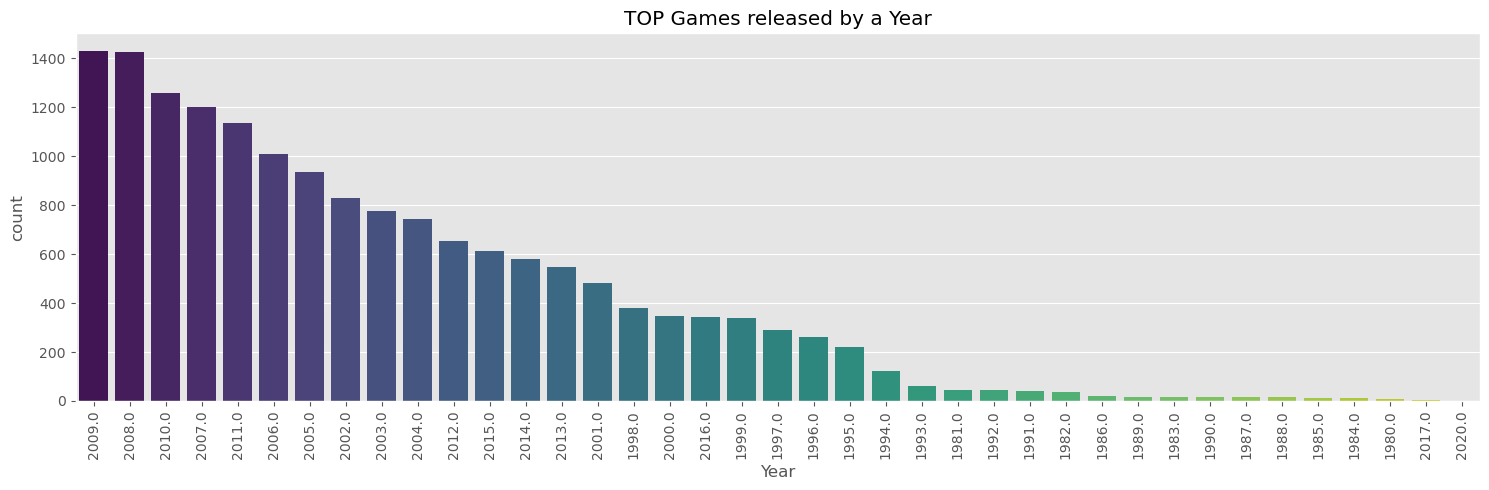

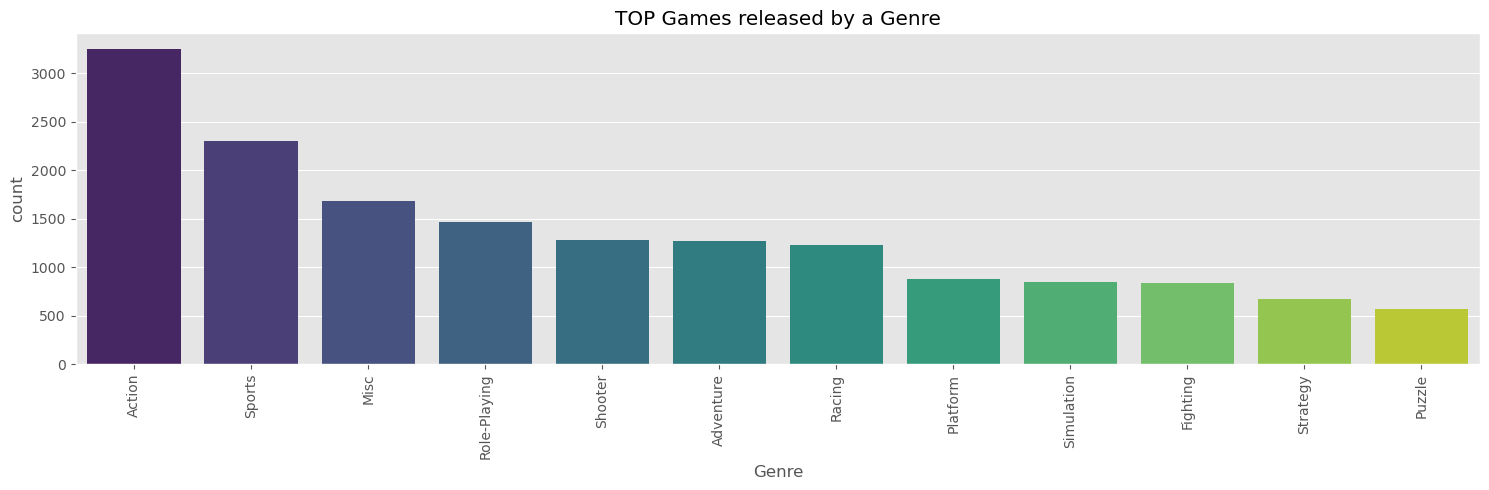

In [ ]:
uni = [
    'Platform', 'Year', 'Genre'
]

for i in uni:
    plt.figure(figsize=(15, 5))
    sns.countplot(x = i, data = df, palette='viridis', order=df[i].value_counts().index).set_title(f'TOP Games released by a {i}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

Looks like most games where realeased in DS, PS2
Most realeased year is 2008 and 2009
Action genre has the most amount of games

TOP 5 year's - TOP 5 Genres

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(
    x='Year',
    data=df[df['Year'].isin(df['Year'].value_counts().iloc[:5].index) & df['Platform'].isin(df['Platform'].value_counts().iloc[:5].index)],
    hue='Platform',
    palette='tab20',
    order=df['Year'].value_counts().iloc[:5].index
).set_title('Top 5 Platforms for Top 5 Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined